In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('Train_Dataset.csv')
df.head()

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001.0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,...,1.0,1.0,1.0,1.0,20.0,7.0,2.0,NaN,M,18932.0
1,5110002.0,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,...,2.0,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0
2,5110003.0,0.0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5.0,...,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0
3,5110004.0,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,...,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,5110005.0,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,...,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0


In [3]:
df.EmployeeID.isnull().sum()

2630

In [4]:
df.isnull().sum()

EmployeeID            2630
Attrition             2630
Age                   2946
TravelProfile         2630
Department            2754
HomeToWork            2885
EducationField        2630
Gender                2676
HourlnWeek            2917
Involvement           2630
WorkLifeBalance       2630
Designation           2668
JobSatisfaction       2630
ESOPs                 2630
NumCompaniesWorked    2630
OverTime              2630
SalaryHikelastYear    2799
WorkExperience        2817
LastPromotion         2700
CurrentProfile        2941
MaritalStatus         2630
MonthlyIncome         2723
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7810 entries, 0 to 7809
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          5180 non-null   float64
 1   Attrition           5180 non-null   float64
 2   Age                 4864 non-null   float64
 3   TravelProfile       5180 non-null   object 
 4   Department          5056 non-null   object 
 5   HomeToWork          4925 non-null   float64
 6   EducationField      5180 non-null   object 
 7   Gender              5134 non-null   object 
 8   HourlnWeek          4893 non-null   float64
 9   Involvement         5180 non-null   float64
 10  WorkLifeBalance     5180 non-null   float64
 11  Designation         5142 non-null   object 
 12  JobSatisfaction     5180 non-null   float64
 13  ESOPs               5180 non-null   float64
 14  NumCompaniesWorked  5180 non-null   float64
 15  OverTime            5180 non-null   float64
 16  Salary

In [6]:
df = df.drop(labels=range(5180, 7810), axis=0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5180 entries, 0 to 5179
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          5180 non-null   float64
 1   Attrition           5180 non-null   float64
 2   Age                 4864 non-null   float64
 3   TravelProfile       5180 non-null   object 
 4   Department          5056 non-null   object 
 5   HomeToWork          4925 non-null   float64
 6   EducationField      5180 non-null   object 
 7   Gender              5134 non-null   object 
 8   HourlnWeek          4893 non-null   float64
 9   Involvement         5180 non-null   float64
 10  WorkLifeBalance     5180 non-null   float64
 11  Designation         5142 non-null   object 
 12  JobSatisfaction     5180 non-null   float64
 13  ESOPs               5180 non-null   float64
 14  NumCompaniesWorked  5180 non-null   float64
 15  OverTime            5180 non-null   float64
 16  Salary

In [8]:
df.isnull().sum()

EmployeeID              0
Attrition               0
Age                   316
TravelProfile           0
Department            124
HomeToWork            255
EducationField          0
Gender                 46
HourlnWeek            287
Involvement             0
WorkLifeBalance         0
Designation            38
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear    169
WorkExperience        187
LastPromotion          70
CurrentProfile        311
MaritalStatus           0
MonthlyIncome          93
dtype: int64

In [9]:
df.head()

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001.0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,...,1.0,1.0,1.0,1.0,20.0,7.0,2.0,NaN,M,18932.0
1,5110002.0,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,...,2.0,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0
2,5110003.0,0.0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5.0,...,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0
3,5110004.0,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,...,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,5110005.0,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,...,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0


In [10]:
df.groupby('Designation')['Age'].mean()

Designation
AVP               47.820122
Executive         32.634822
Manager           36.784280
Senior Manager    40.528178
VP                48.170404
Name: Age, dtype: float64

In [11]:
ind = df[df['Age'].isnull()].index

In [12]:
for i in ind:
    if df.loc[i,'Designation'] == 'AVP':
        df.loc[i,'Age'] = 48
    if df.loc[i,'Designation'] == 'Executive':
        df.loc[i,'Age'] = 33
    if df.loc[i,'Designation'] == 'Manager':
        df.loc[i,'Age'] = 37
    if df.loc[i,'Designation'] == 'Senior Manager':
        df.loc[i,'Age'] = 41
    if df.loc[i,'Designation'] == 'VP':
        df.loc[i,'Age'] = 48

In [13]:
df.isnull().sum()

EmployeeID              0
Attrition               0
Age                     0
TravelProfile           0
Department            124
HomeToWork            255
EducationField          0
Gender                 46
HourlnWeek            287
Involvement             0
WorkLifeBalance         0
Designation            38
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear    169
WorkExperience        187
LastPromotion          70
CurrentProfile        311
MaritalStatus           0
MonthlyIncome          93
dtype: int64

In [14]:
pd.crosstab(df['EducationField'],df['Department'])

Department,Analytics,Marketing,Sales
EducationField,,,
CA,1185,40,308
Engineer,335,15,125
MBA,0,112,0
Marketing Diploma,0,0,590
Other,211,9,62
Statistics,1488,46,530


In [15]:
ind = df[df['Department'].isnull()].index

In [16]:
for i in ind:
    if df.loc[i,'EducationField'] == 'CA' or 'Engineer' or 'Other' or 'Statistics':
        df.loc[i,'Department'] = 'Analytics'
    if df.loc[i,'EducationField'] == 'MBA':
        df.loc[i,'Department'] = 'Marketing'
    if df.loc[i,'EducationField'] == 'Marketing Diploma':
        df.loc[i,'Department'] = 'Sales'

In [17]:
df.isnull().sum()

EmployeeID              0
Attrition               0
Age                     0
TravelProfile           0
Department              0
HomeToWork            255
EducationField          0
Gender                 46
HourlnWeek            287
Involvement             0
WorkLifeBalance         0
Designation            38
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear    169
WorkExperience        187
LastPromotion          70
CurrentProfile        311
MaritalStatus           0
MonthlyIncome          93
dtype: int64

In [18]:
df.HomeToWork.fillna(df.HomeToWork.mean(), inplace=True)

In [19]:
df.isnull().sum()

EmployeeID              0
Attrition               0
Age                     0
TravelProfile           0
Department              0
HomeToWork              0
EducationField          0
Gender                 46
HourlnWeek            287
Involvement             0
WorkLifeBalance         0
Designation            38
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear    169
WorkExperience        187
LastPromotion          70
CurrentProfile        311
MaritalStatus           0
MonthlyIncome          93
dtype: int64

In [20]:
df.Gender.unique()

array(['Male', 'Female', 'F', nan], dtype=object)

In [21]:
df.Gender.replace('F','Female', inplace=True)

In [22]:
df.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [23]:
df.Gender.fillna(df.Gender.mode()[0], inplace=True)

In [24]:
df.isnull().sum()

EmployeeID              0
Attrition               0
Age                     0
TravelProfile           0
Department              0
HomeToWork              0
EducationField          0
Gender                  0
HourlnWeek            287
Involvement             0
WorkLifeBalance         0
Designation            38
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear    169
WorkExperience        187
LastPromotion          70
CurrentProfile        311
MaritalStatus           0
MonthlyIncome          93
dtype: int64

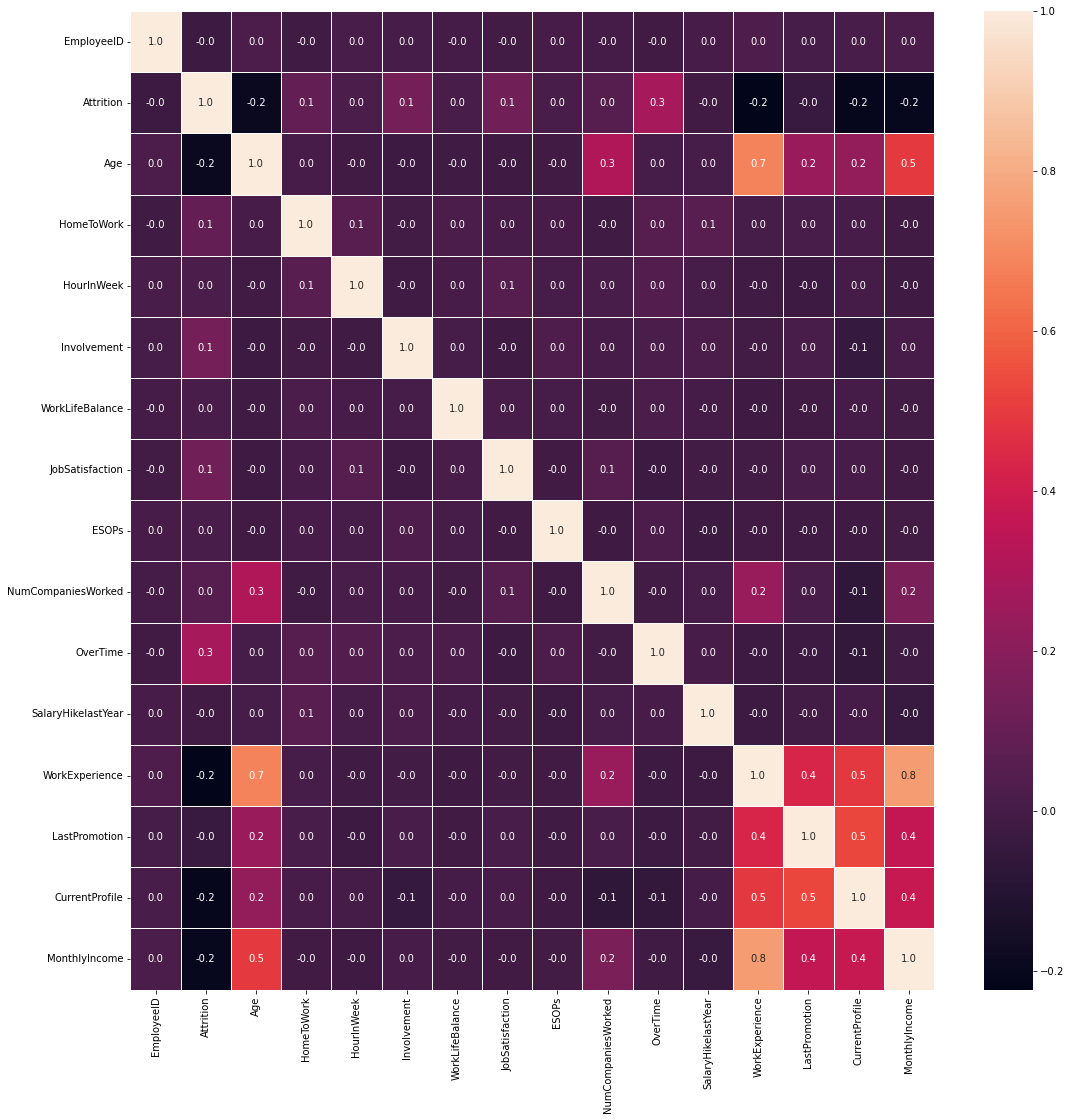

In [25]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [26]:
df.HourlnWeek.fillna(df.HourlnWeek.mean(),inplace=True)

In [27]:
df.isnull().sum()

EmployeeID              0
Attrition               0
Age                     0
TravelProfile           0
Department              0
HomeToWork              0
EducationField          0
Gender                  0
HourlnWeek              0
Involvement             0
WorkLifeBalance         0
Designation            38
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear    169
WorkExperience        187
LastPromotion          70
CurrentProfile        311
MaritalStatus           0
MonthlyIncome          93
dtype: int64

In [28]:
df.groupby('Designation')['MonthlyIncome'].median()

Designation
AVP               31307.0
Executive         18121.0
Manager           20765.0
Senior Manager    25333.0
VP                34609.5
Name: MonthlyIncome, dtype: float64

In [29]:
ind = df[df['Designation'].isnull()].index

In [30]:
for i in ind:
    if df.loc[i,'MonthlyIncome'] > 34500:
        df.loc[i,'Designation'] = 'VP'
    if (df.loc[i,'MonthlyIncome'] > 31000) & (df.loc[i,'MonthlyIncome'] < 34500):
        df.loc[i,'Designation'] = 'AVP'
    if (df.loc[i,'MonthlyIncome'] > 25000) & (df.loc[i,'MonthlyIncome'] < 31000):
        df.loc[i,'Designation'] = 'Senior Manager'
    if (df.loc[i,'MonthlyIncome'] > 20500) & (df.loc[i,'MonthlyIncome'] < 25000):
        df.loc[i,'Designation'] = 'Manager'
    if (df.loc[i,'MonthlyIncome'] < 20500):
        df.loc[i,'Designation'] = 'Executive'

In [31]:
df.isnull().sum()

EmployeeID              0
Attrition               0
Age                     0
TravelProfile           0
Department              0
HomeToWork              0
EducationField          0
Gender                  0
HourlnWeek              0
Involvement             0
WorkLifeBalance         0
Designation             0
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear    169
WorkExperience        187
LastPromotion          70
CurrentProfile        311
MaritalStatus           0
MonthlyIncome          93
dtype: int64

In [32]:
df.SalaryHikelastYear.fillna(df.SalaryHikelastYear.mean(), inplace=True)

In [33]:
ind = df[df['WorkExperience'].isnull()].index

In [34]:
for i in ind:
    df.loc[i,'WorkExperience'] = df.loc[i,'Age'] - 18

In [35]:
df.isnull().sum()

EmployeeID              0
Attrition               0
Age                     0
TravelProfile           0
Department              0
HomeToWork              0
EducationField          0
Gender                  0
HourlnWeek              0
Involvement             0
WorkLifeBalance         0
Designation             0
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear      0
WorkExperience          0
LastPromotion          70
CurrentProfile        311
MaritalStatus           0
MonthlyIncome          93
dtype: int64

In [36]:
df.LastPromotion.fillna(df.LastPromotion.mean(), inplace = True)

In [37]:
df.CurrentProfile.fillna(df.CurrentProfile.mean(), inplace = True)

In [38]:
df.isnull().sum()

EmployeeID             0
Attrition              0
Age                    0
TravelProfile          0
Department             0
HomeToWork             0
EducationField         0
Gender                 0
HourlnWeek             0
Involvement            0
WorkLifeBalance        0
Designation            0
JobSatisfaction        0
ESOPs                  0
NumCompaniesWorked     0
OverTime               0
SalaryHikelastYear     0
WorkExperience         0
LastPromotion          0
CurrentProfile         0
MaritalStatus          0
MonthlyIncome         93
dtype: int64

In [39]:
df.groupby('Designation')['MonthlyIncome'].mean()

Designation
AVP               30796.772586
Executive         18206.137046
Manager           20925.643105
Senior Manager    25306.265604
VP                34657.644144
Name: MonthlyIncome, dtype: float64

In [40]:
ind = df[df['MonthlyIncome'].isnull()].index

In [41]:
for i in ind:
    if df.loc[i,'Designation'] == 'VP':
        df.loc[i,'MonthlyIncome'] = 34500
    if df.loc[i,'Designation'] == 'AVP':
        df.loc[i,'MonthlyIncome'] = 30500
    if df.loc[i,'Designation'] == 'Senior Manager':
        df.loc[i,'MonthlyIncome'] = 25500
    if df.loc[i,'Designation'] == 'Manager':
        df.loc[i,'MonthlyIncome'] = 21000
    if df.loc[i,'Designation'] == 'Executive':
        df.loc[i,'MonthlyIncome'] = 18000

In [42]:
df.isnull().sum()

EmployeeID            0
Attrition             0
Age                   0
TravelProfile         0
Department            0
HomeToWork            0
EducationField        0
Gender                0
HourlnWeek            0
Involvement           0
WorkLifeBalance       0
Designation           0
JobSatisfaction       0
ESOPs                 0
NumCompaniesWorked    0
OverTime              0
SalaryHikelastYear    0
WorkExperience        0
LastPromotion         0
CurrentProfile        0
MaritalStatus         0
MonthlyIncome         0
dtype: int64

In [43]:
df.head()

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001.0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,...,1.0,1.0,1.0,1.0,20.0,7.0,2.0,4.385295,M,18932.0
1,5110002.0,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,...,2.0,0.0,8.0,0.0,20.0,4.0,1.0,4.385295,Single,18785.0
2,5110003.0,0.0,31.0,Rarely,Analytics,5.0,Statistics,Female,45.0,5.0,...,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.000000,Single,22091.0
3,5110004.0,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,...,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.000000,Divorsed,20302.0
4,5110005.0,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,...,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.000000,Divorsed,21674.0


In [44]:
df.drop('EmployeeID', axis = 1, inplace=True)

In [45]:
df_num = df.select_dtypes(exclude='object')
df_cat = df.select_dtypes(include='object')

In [46]:
y = df_num['Attrition']
df_num.drop('Attrition',axis = 1, inplace=True)

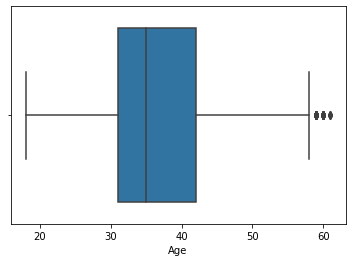

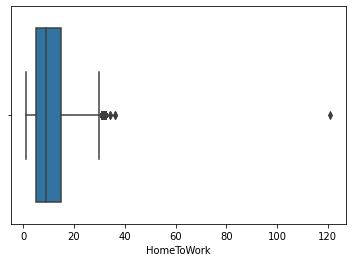

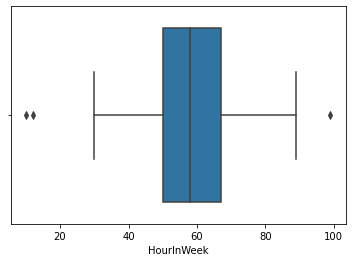

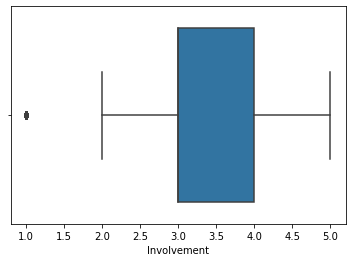

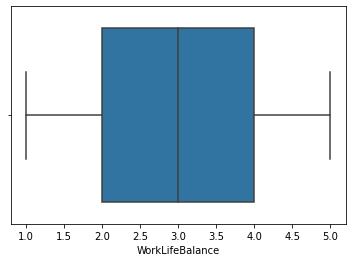

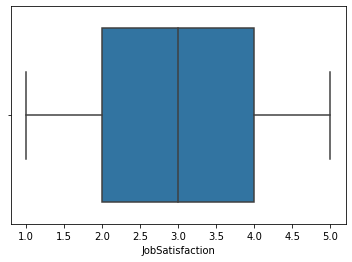

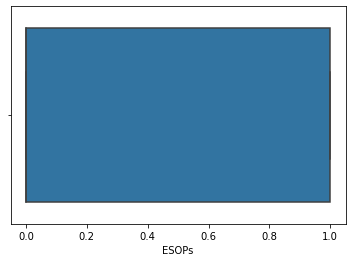

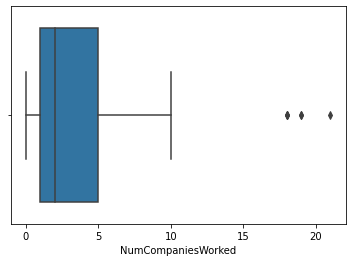

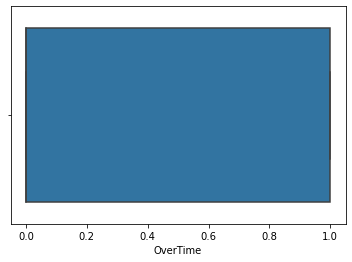

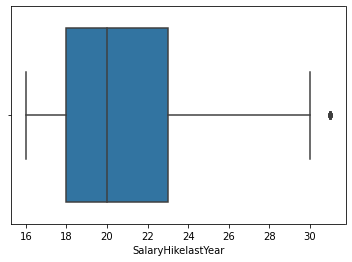

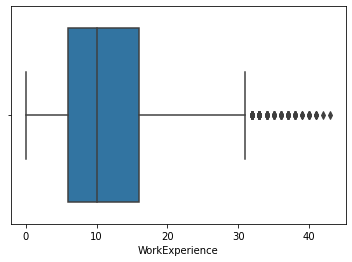

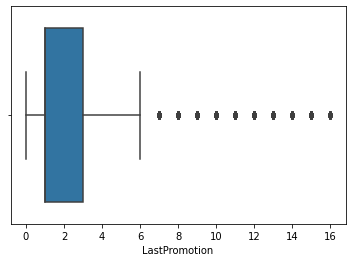

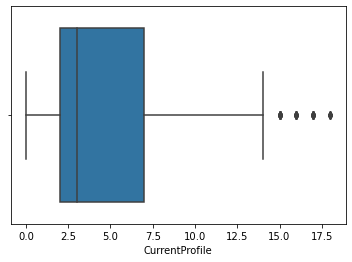

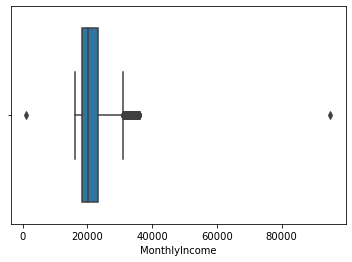

In [47]:
for i in df_num.columns:
    sns.boxplot(df_num[i])
    plt.show()

In [48]:
# CApping the Outlier / Winzoriation
for i in df_num.columns:
    q1=df_num[i].quantile(0.25)
    q3=df_num[i].quantile(0.75)
    iqr=q3-q1
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    uc=df_num[i].quantile(0.99)
    lc=df_num[i].quantile(0.01)
    for ind1 in df_num[i].index:
        if df_num.loc[ind1,i]>ub:
            df_num.loc[ind1,i]=uc
        if df_num.loc[ind1,i]<lb:
            df_num.loc[ind1,i]=lc

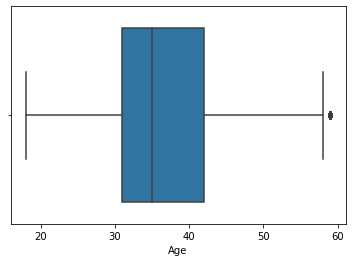

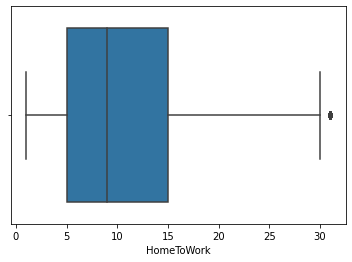

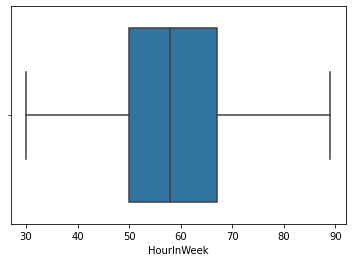

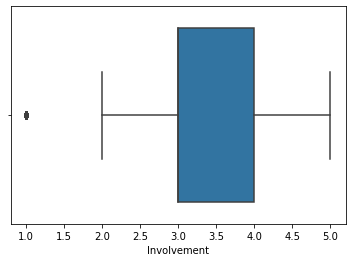

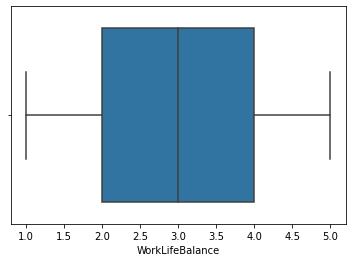

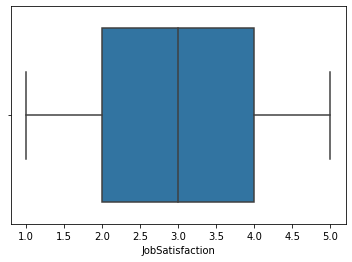

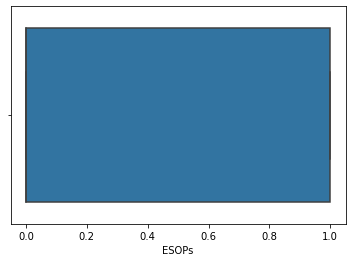

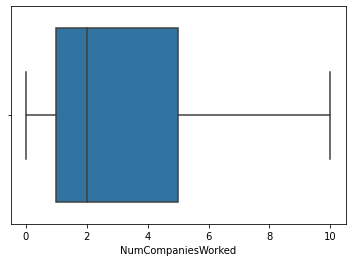

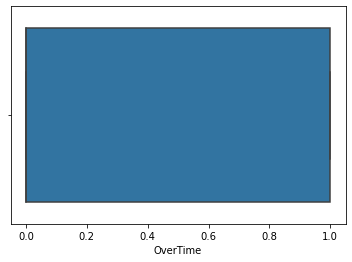

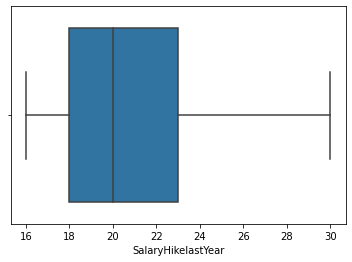

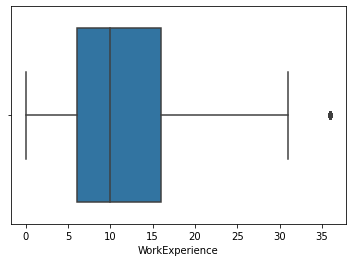

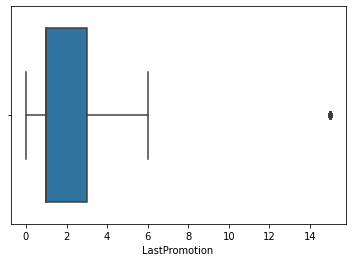

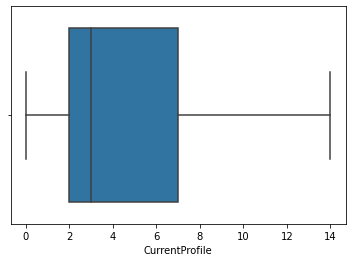

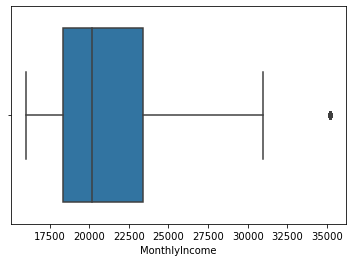

In [49]:
for i in df_num.columns:
    sns.boxplot(df_num[i])
    plt.show()

In [50]:
df_num

,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MonthlyIncome
0,35.0,5.000000,69.0,1.0,1.0,1.0,1.0,1.0,1.0,20.0,7.0,2.0,4.385295,18932.0
1,32.0,5.000000,62.0,4.0,3.0,2.0,0.0,8.0,0.0,20.0,4.0,1.0,4.385295,18785.0
2,31.0,5.000000,45.0,5.0,3.0,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.000000,22091.0
3,34.0,10.000000,32.0,3.0,2.0,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.000000,20302.0
4,37.0,27.000000,49.0,3.0,4.0,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.000000,21674.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5175,36.0,13.000000,53.0,3.0,3.0,3.0,0.0,4.0,1.0,22.0,11.0,1.0,5.000000,22142.0
5176,33.0,9.000000,66.0,1.0,4.0,4.0,1.0,9.0,0.0,23.0,8.0,0.0,2.000000,17109.0
5177,29.0,11.107411,62.0,4.0,2.0,1.0,1.0,6.0,0.0,19.0,8.0,0.0,3.000000,17532.0
5178,26.0,26.000000,61.0,3.0,4.0,3.0,0.0,1.0,0.0,28.0,8.0,5.0,7.000000,17942.0


In [51]:
df_cat

,TravelProfile,Department,EducationField,Gender,Designation,MaritalStatus
0,Rarely,Analytics,CA,Male,Executive,M
1,Yes,Sales,Statistics,Female,Executive,Single
2,Rarely,Analytics,Statistics,Female,Manager,Single
3,Yes,Sales,Statistics,Female,Manager,Divorsed
4,No,Analytics,Statistics,Female,Manager,Divorsed
...,...,...,...,...,...,...
5175,Rarely,Analytics,CA,Female,Manager,Single
5176,Rarely,Marketing,CA,Female,Executive,Single
5177,Rarely,Analytics,CA,Female,Executive,M
5178,Rarely,Marketing,Statistics,Female,Executive,Divorsed


In [52]:
df.MaritalStatus.unique()

array(['M', 'Single', 'Divorsed', 'Married'], dtype=object)

In [53]:
df.MaritalStatus.replace('M','Married', inplace=True)

In [54]:
df.MaritalStatus.unique()

array(['Married', 'Single', 'Divorsed'], dtype=object)

In [55]:
df_cat

,TravelProfile,Department,EducationField,Gender,Designation,MaritalStatus
0,Rarely,Analytics,CA,Male,Executive,Married
1,Yes,Sales,Statistics,Female,Executive,Single
2,Rarely,Analytics,Statistics,Female,Manager,Single
3,Yes,Sales,Statistics,Female,Manager,Divorsed
4,No,Analytics,Statistics,Female,Manager,Divorsed
...,...,...,...,...,...,...
5175,Rarely,Analytics,CA,Female,Manager,Single
5176,Rarely,Marketing,CA,Female,Executive,Single
5177,Rarely,Analytics,CA,Female,Executive,Married
5178,Rarely,Marketing,Statistics,Female,Executive,Divorsed


In [56]:
from sklearn.preprocessing import OrdinalEncoder
odetp=OrdinalEncoder(categories=[['No','Rarely','Yes']])
df_cat['TravelProfile']=odetp.fit_transform(df_cat['TravelProfile'].values.reshape(-1,1))

In [57]:
df_cat

,TravelProfile,Department,EducationField,Gender,Designation,MaritalStatus
0,1.0,Analytics,CA,Male,Executive,Married
1,2.0,Sales,Statistics,Female,Executive,Single
2,1.0,Analytics,Statistics,Female,Manager,Single
3,2.0,Sales,Statistics,Female,Manager,Divorsed
4,0.0,Analytics,Statistics,Female,Manager,Divorsed
...,...,...,...,...,...,...
5175,1.0,Analytics,CA,Female,Manager,Single
5176,1.0,Marketing,CA,Female,Executive,Single
5177,1.0,Analytics,CA,Female,Executive,Married
5178,1.0,Marketing,Statistics,Female,Executive,Divorsed


In [58]:
odedg=OrdinalEncoder(categories=[['Executive','Manager','Senior Manager','AVP','VP']])
df_cat['Designation']=odedg.fit_transform(df_cat['Designation'].values.reshape(-1,1))

In [59]:
df_cat

,TravelProfile,Department,EducationField,Gender,Designation,MaritalStatus
0,1.0,Analytics,CA,Male,0.0,Married
1,2.0,Sales,Statistics,Female,0.0,Single
2,1.0,Analytics,Statistics,Female,1.0,Single
3,2.0,Sales,Statistics,Female,1.0,Divorsed
4,0.0,Analytics,Statistics,Female,1.0,Divorsed
...,...,...,...,...,...,...
5175,1.0,Analytics,CA,Female,1.0,Single
5176,1.0,Marketing,CA,Female,0.0,Single
5177,1.0,Analytics,CA,Female,0.0,Married
5178,1.0,Marketing,Statistics,Female,0.0,Divorsed


In [60]:
from sklearn.preprocessing import LabelEncoder
ledp=LabelEncoder()
leef=LabelEncoder()
legn=LabelEncoder()
lems=LabelEncoder()
df_cat['Department']=ledp.fit_transform(df_cat['Department'])
df_cat['EducationField']=leef.fit_transform(df_cat['EducationField'])
df_cat['Gender']=legn.fit_transform(df_cat['Gender'])
df_cat['MaritalStatus']=lems.fit_transform(df_cat['MaritalStatus'])

In [61]:
df_cat

,TravelProfile,Department,EducationField,Gender,Designation,MaritalStatus
0,1.0,0,0,1,0.0,1
1,2.0,2,5,0,0.0,2
2,1.0,0,5,0,1.0,2
3,2.0,2,5,0,1.0,0
4,0.0,0,5,0,1.0,0
...,...,...,...,...,...,...
5175,1.0,0,0,0,1.0,2
5176,1.0,1,0,0,0.0,2
5177,1.0,0,0,0,0.0,1
5178,1.0,1,5,0,0.0,0


In [62]:
x = pd.concat([df_num, df_cat],axis = 1)

In [63]:
x.head()

,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MonthlyIncome,TravelProfile,Department,EducationField,Gender,Designation,MaritalStatus
0,35.0,5.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,20.0,7.0,2.0,4.385295,18932.0,1.0,0,0,1,0.0,1
1,32.0,5.0,62.0,4.0,3.0,2.0,0.0,8.0,0.0,20.0,4.0,1.0,4.385295,18785.0,2.0,2,5,0,0.0,2
2,31.0,5.0,45.0,5.0,3.0,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.000000,22091.0,1.0,0,5,0,1.0,2
3,34.0,10.0,32.0,3.0,2.0,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.000000,20302.0,2.0,2,5,0,1.0,0
4,37.0,27.0,49.0,3.0,4.0,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.000000,21674.0,0.0,0,5,0,1.0,0


In [64]:
y

0       0.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
5175    0.0
5176    0.0
5177    0.0
5178    0.0
5179    1.0
Name: Attrition, Length: 5180, dtype: float64

In [122]:
#from sklearn.linear_model import LogisticRegression
#logreg = LogisticRegression(solver='lbfgs')

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
model = rf.fit(x, y)

In [66]:
#logreg_model = logreg.fit(x, y)

In [67]:
test = pd.read_csv('Test_Dataset.csv')

In [68]:
test.head(5)

,EmployeeID,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,6110001,18.0,No,NaN,9.0,CA,Male,80.0,3,2,...,3,1,1,0,17.0,0.0,0.0,0.0,Single,16904.0
1,6110002,20.0,Rarely,Analytics,28.0,Statistics,Female,59.0,1,3,...,1,1,2,1,18.0,2.0,1.0,NaN,Single,18994.0
2,6110003,50.0,Rarely,Analytics,19.0,CA,Female,76.0,3,3,...,5,0,5,1,22.0,18.0,3.0,3.0,M,18587.0
3,6110004,32.0,Rarely,Sales,23.0,Statistics,Female,73.0,5,2,...,3,0,4,1,17.0,5.0,3.0,3.0,Married,20559.0
4,6110005,39.0,Rarely,Analytics,7.0,CA,Male,42.0,4,1,...,5,1,4,0,20.0,9.0,1.0,7.0,Married,24991.0


In [69]:
test.isnull().sum()

EmployeeID              0
Age                   142
TravelProfile           0
Department             58
HomeToWork            126
EducationField          0
Gender                 30
HourlnWeek            136
Involvement             0
WorkLifeBalance         0
Designation            30
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear     94
WorkExperience        122
LastPromotion          57
CurrentProfile        134
MaritalStatus           0
MonthlyIncome          33
dtype: int64

In [70]:
df.groupby('Designation')['Age'].mean()

Designation
AVP               47.820122
Executive         32.715640
Manager           36.785877
Senior Manager    40.528178
VP                48.170404
Name: Age, dtype: float64

In [71]:
ind = test[test['Age'].isnull()].index

In [72]:
for i in ind:
    if test.loc[i,'Designation'] == 'AVP':
        test.loc[i,'Age'] = 48
    if test.loc[i,'Designation'] == 'Executive':
        test.loc[i,'Age'] = 33
    if test.loc[i,'Designation'] == 'Manager':
        test.loc[i,'Age'] = 37
    if test.loc[i,'Designation'] == 'Senior Manager':
        test.loc[i,'Age'] = 41
    if test.loc[i,'Designation'] == 'VP':
        test.loc[i,'Age'] = 48

In [73]:
pd.crosstab(df['EducationField'],df['Department'])

Department,Analytics,Marketing,Sales
EducationField,,,
CA,1212,40,308
Engineer,347,15,125
MBA,0,117,0
Marketing Diploma,0,0,603
Other,213,9,62
Statistics,1553,46,530


In [74]:
ind = test[test['Department'].isnull()].index

In [75]:
for i in ind:
    if test.loc[i,'EducationField'] == 'CA' or 'Engineer' or 'Other' or 'Statistics':
        test.loc[i,'Department'] = 'Analytics'
    if test.loc[i,'EducationField'] == 'MBA':
        test.loc[i,'Department'] = 'Marketing'
    if test.loc[i,'EducationField'] == 'Marketing Diploma':
        test.loc[i,'Department'] = 'Sales'

In [76]:
test.isnull().sum()

EmployeeID              0
Age                     0
TravelProfile           0
Department              0
HomeToWork            126
EducationField          0
Gender                 30
HourlnWeek            136
Involvement             0
WorkLifeBalance         0
Designation            30
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear     94
WorkExperience        122
LastPromotion          57
CurrentProfile        134
MaritalStatus           0
MonthlyIncome          33
dtype: int64

In [77]:
test.HomeToWork.fillna(df.HomeToWork.mean(), inplace=True)

In [78]:
test.Gender.unique()

array(['Male', 'Female', 'F', nan], dtype=object)

In [79]:
test.Gender.replace('F','Female', inplace=True)

In [80]:
test.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [81]:
test.Gender.fillna(df.Gender.mode()[0], inplace=True)

In [82]:
test.isnull().sum()

EmployeeID              0
Age                     0
TravelProfile           0
Department              0
HomeToWork              0
EducationField          0
Gender                  0
HourlnWeek            136
Involvement             0
WorkLifeBalance         0
Designation            30
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear     94
WorkExperience        122
LastPromotion          57
CurrentProfile        134
MaritalStatus           0
MonthlyIncome          33
dtype: int64

In [83]:
test.HourlnWeek.fillna(df.HourlnWeek.mean(),inplace=True)

In [84]:
test.isnull().sum()

EmployeeID              0
Age                     0
TravelProfile           0
Department              0
HomeToWork              0
EducationField          0
Gender                  0
HourlnWeek              0
Involvement             0
WorkLifeBalance         0
Designation            30
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear     94
WorkExperience        122
LastPromotion          57
CurrentProfile        134
MaritalStatus           0
MonthlyIncome          33
dtype: int64

In [85]:
df.groupby('Designation')['MonthlyIncome'].median()

Designation
AVP               31124.0
Executive         18119.0
Manager           20797.0
Senior Manager    25368.0
VP                34606.0
Name: MonthlyIncome, dtype: float64

In [86]:
ind = test[test['Designation'].isnull()].index

In [87]:
for i in ind:
    if test.loc[i,'MonthlyIncome'] > 34500:
        test.loc[i,'Designation'] = 'VP'
    if (test.loc[i,'MonthlyIncome'] > 31000) & (test.loc[i,'MonthlyIncome'] < 34500):
        test.loc[i,'Designation'] = 'AVP'
    if (test.loc[i,'MonthlyIncome'] > 25000) & (test.loc[i,'MonthlyIncome'] < 31000):
        test.loc[i,'Designation'] = 'Senior Manager'
    if (test.loc[i,'MonthlyIncome'] > 20500) & (test.loc[i,'MonthlyIncome'] < 25000):
        test.loc[i,'Designation'] = 'Manager'
    if (test.loc[i,'MonthlyIncome'] < 20500):
        test.loc[i,'Designation'] = 'Executive'

In [88]:
test.isnull().sum()

EmployeeID              0
Age                     0
TravelProfile           0
Department              0
HomeToWork              0
EducationField          0
Gender                  0
HourlnWeek              0
Involvement             0
WorkLifeBalance         0
Designation             0
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear     94
WorkExperience        122
LastPromotion          57
CurrentProfile        134
MaritalStatus           0
MonthlyIncome          33
dtype: int64

In [89]:
test.SalaryHikelastYear.fillna(df.SalaryHikelastYear.mean(), inplace=True)

In [90]:
ind = test[test['WorkExperience'].isnull()].index

In [91]:
for i in ind:
    test.loc[i,'WorkExperience'] = test.loc[i,'Age'] - 18

In [92]:
test.isnull().sum()

EmployeeID              0
Age                     0
TravelProfile           0
Department              0
HomeToWork              0
EducationField          0
Gender                  0
HourlnWeek              0
Involvement             0
WorkLifeBalance         0
Designation             0
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear      0
WorkExperience          0
LastPromotion          57
CurrentProfile        134
MaritalStatus           0
MonthlyIncome          33
dtype: int64

In [93]:
test.LastPromotion.fillna(df.LastPromotion.mean(), inplace = True)

In [94]:
test.CurrentProfile.fillna(df.CurrentProfile.mean(), inplace = True)

In [95]:
test.isnull().sum()

EmployeeID             0
Age                    0
TravelProfile          0
Department             0
HomeToWork             0
EducationField         0
Gender                 0
HourlnWeek             0
Involvement            0
WorkLifeBalance        0
Designation            0
JobSatisfaction        0
ESOPs                  0
NumCompaniesWorked     0
OverTime               0
SalaryHikelastYear     0
WorkExperience         0
LastPromotion          0
CurrentProfile         0
MaritalStatus          0
MonthlyIncome         33
dtype: int64

In [96]:
df.groupby('Designation')['MonthlyIncome'].mean()

Designation
AVP               30790.439024
Executive         18201.740758
Manager           20926.913440
Senior Manager    25308.804718
VP                34656.937220
Name: MonthlyIncome, dtype: float64

In [97]:
ind = test[test['MonthlyIncome'].isnull()].index

In [98]:
for i in ind:
    if test.loc[i,'Designation'] == 'VP':
        test.loc[i,'MonthlyIncome'] = 34500
    if test.loc[i,'Designation'] == 'AVP':
        test.loc[i,'MonthlyIncome'] = 30500
    if test.loc[i,'Designation'] == 'Senior Manager':
        test.loc[i,'MonthlyIncome'] = 25500
    if test.loc[i,'Designation'] == 'Manager':
        test.loc[i,'MonthlyIncome'] = 21000
    if test.loc[i,'Designation'] == 'Executive':
        test.loc[i,'MonthlyIncome'] = 18000

In [99]:
test.isnull().sum()

EmployeeID            0
Age                   0
TravelProfile         0
Department            0
HomeToWork            0
EducationField        0
Gender                0
HourlnWeek            0
Involvement           0
WorkLifeBalance       0
Designation           0
JobSatisfaction       0
ESOPs                 0
NumCompaniesWorked    0
OverTime              0
SalaryHikelastYear    0
WorkExperience        0
LastPromotion         0
CurrentProfile        0
MaritalStatus         0
MonthlyIncome         0
dtype: int64

In [100]:
test.drop('EmployeeID', axis = 1, inplace=True)

In [101]:
test_num = test.select_dtypes(exclude='object')
test_cat = test.select_dtypes(include='object')

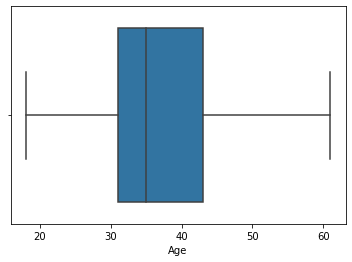

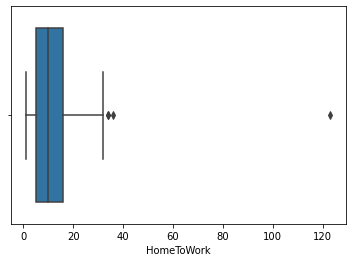

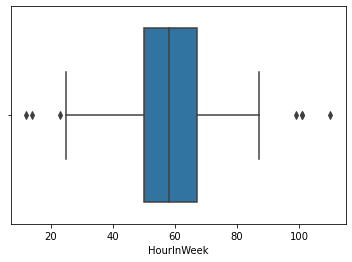

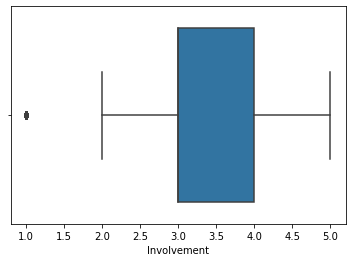

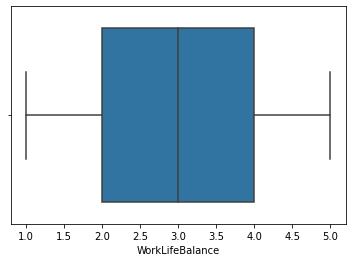

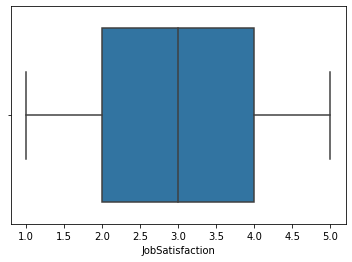

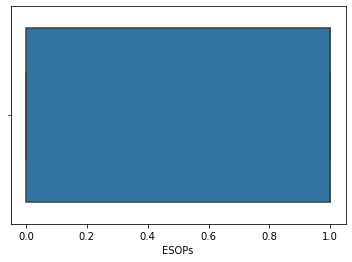

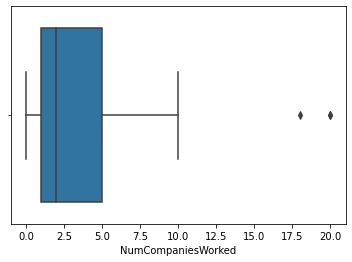

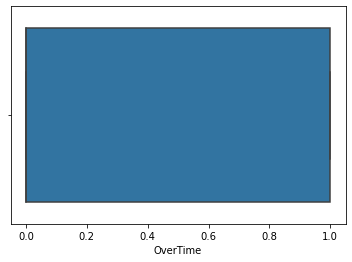

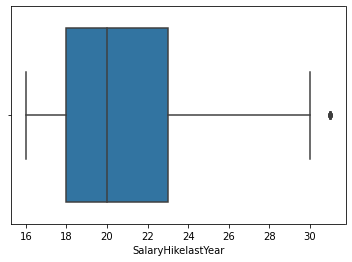

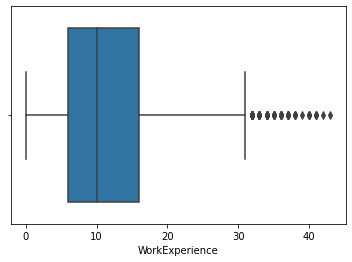

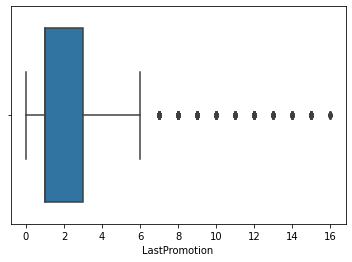

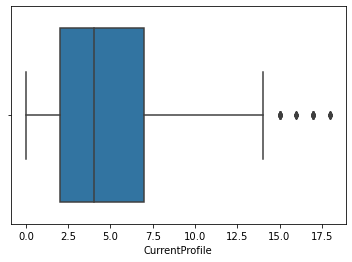

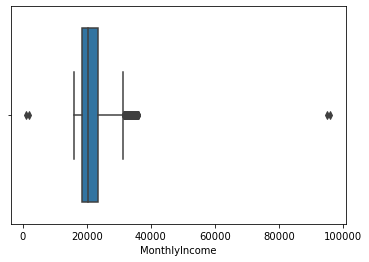

In [102]:
for i in test_num.columns:
    sns.boxplot(test_num[i])
    plt.show()

In [103]:
# CApping the Outlier / Winzoriation
for i in test_num.columns:
    q1=test_num[i].quantile(0.25)
    q3=test_num[i].quantile(0.75)
    iqr=q3-q1
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    uc=test_num[i].quantile(0.99)
    lc=test_num[i].quantile(0.01)
    for ind1 in test_num[i].index:
        if test_num.loc[ind1,i]>ub:
            test_num.loc[ind1,i]=uc
        if test_num.loc[ind1,i]<lb:
            test_num.loc[ind1,i]=lc

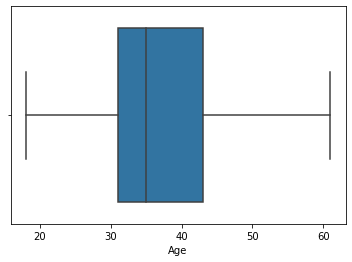

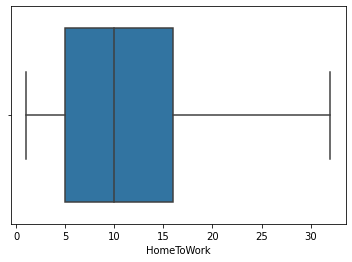

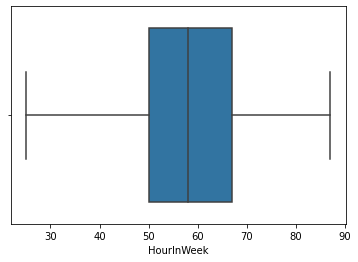

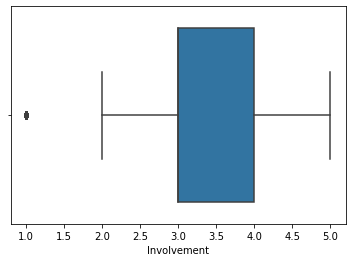

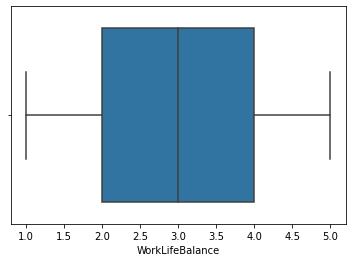

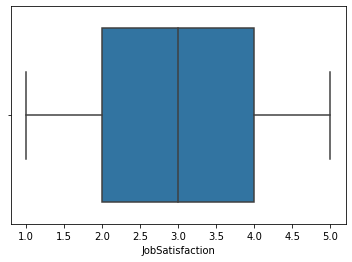

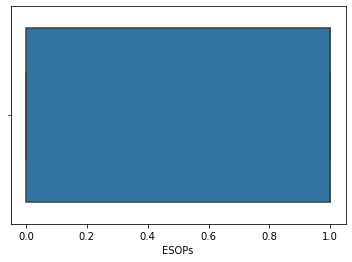

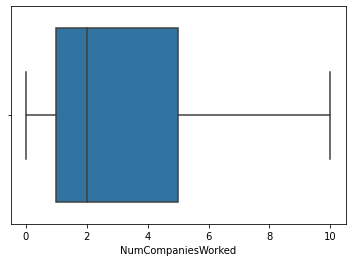

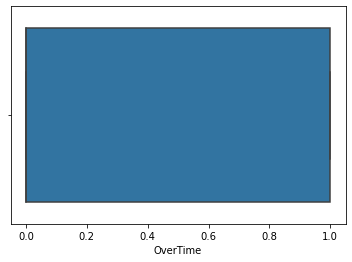

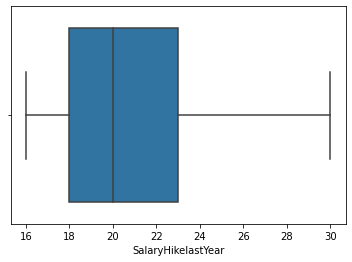

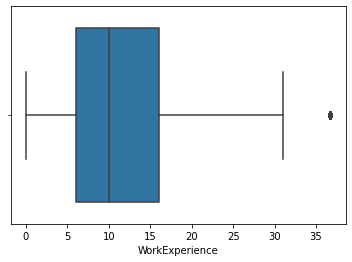

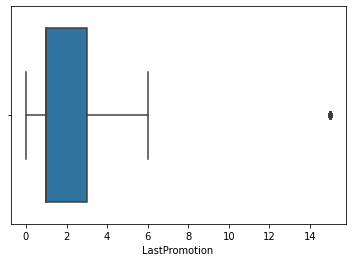

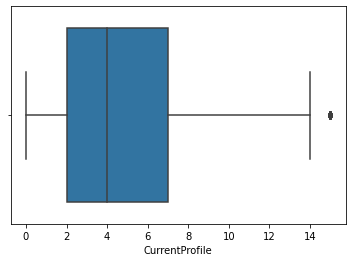

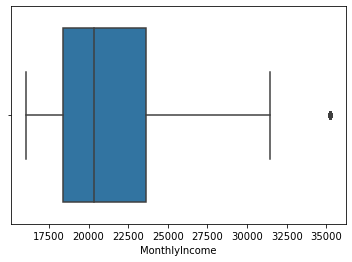

In [104]:
for i in test_num.columns:
    sns.boxplot(test_num[i])
    plt.show()

In [105]:
test_num

,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MonthlyIncome
0,18.0,9.0,80.000000,3,2,3,1,1,0,17.0,0.0,0.0,0.000000,16904.00
1,20.0,28.0,59.000000,1,3,1,1,2,1,18.0,2.0,1.0,4.385295,18994.00
2,50.0,19.0,76.000000,3,3,5,0,5,1,22.0,18.0,3.0,3.000000,18587.00
3,32.0,23.0,73.000000,5,2,3,0,4,1,17.0,5.0,3.0,3.000000,20559.00
4,39.0,7.0,42.000000,4,1,5,1,4,0,20.0,9.0,1.0,7.000000,24991.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625,46.0,12.0,76.000000,3,5,5,1,5,1,18.0,10.0,1.0,3.000000,26761.00
2626,29.0,22.0,80.000000,4,4,5,0,2,0,18.0,7.0,4.0,4.000000,19196.00
2627,44.0,8.0,42.000000,4,1,1,1,3,0,19.0,24.0,5.0,15.000000,25248.00
2628,33.0,11.0,57.979767,4,3,4,0,2,0,18.0,2.0,1.0,1.000000,17261.00


In [106]:
test_cat

,TravelProfile,Department,EducationField,Gender,Designation,MaritalStatus
0,No,Analytics,CA,Male,Executive,Single
1,Rarely,Analytics,Statistics,Female,Executive,Single
2,Rarely,Analytics,CA,Female,Executive,M
3,Rarely,Sales,Statistics,Female,Manager,Married
4,Rarely,Analytics,CA,Male,Senior Manager,Married
...,...,...,...,...,...,...
2625,Rarely,Sales,Marketing Diploma,Male,Senior Manager,Married
2626,Rarely,Analytics,CA,Male,Executive,Divorsed
2627,Rarely,Analytics,CA,Female,Senior Manager,Married
2628,Rarely,Analytics,Statistics,Female,Executive,Single


In [107]:
test.MaritalStatus.unique()

array(['Single', 'M', 'Married', 'Divorsed'], dtype=object)

In [108]:
test.MaritalStatus.replace('M','Married', inplace=True)

In [109]:
test.MaritalStatus.unique()

array(['Single', 'Married', 'Divorsed'], dtype=object)

In [110]:
test_cat

,TravelProfile,Department,EducationField,Gender,Designation,MaritalStatus
0,No,Analytics,CA,Male,Executive,Single
1,Rarely,Analytics,Statistics,Female,Executive,Single
2,Rarely,Analytics,CA,Female,Executive,Married
3,Rarely,Sales,Statistics,Female,Manager,Married
4,Rarely,Analytics,CA,Male,Senior Manager,Married
...,...,...,...,...,...,...
2625,Rarely,Sales,Marketing Diploma,Male,Senior Manager,Married
2626,Rarely,Analytics,CA,Male,Executive,Divorsed
2627,Rarely,Analytics,CA,Female,Senior Manager,Married
2628,Rarely,Analytics,Statistics,Female,Executive,Single


In [111]:
test_cat['TravelProfile']=odetp.transform(test_cat['TravelProfile'].values.reshape(-1,1))

In [112]:
test_cat

,TravelProfile,Department,EducationField,Gender,Designation,MaritalStatus
0,0.0,Analytics,CA,Male,Executive,Single
1,1.0,Analytics,Statistics,Female,Executive,Single
2,1.0,Analytics,CA,Female,Executive,Married
3,1.0,Sales,Statistics,Female,Manager,Married
4,1.0,Analytics,CA,Male,Senior Manager,Married
...,...,...,...,...,...,...
2625,1.0,Sales,Marketing Diploma,Male,Senior Manager,Married
2626,1.0,Analytics,CA,Male,Executive,Divorsed
2627,1.0,Analytics,CA,Female,Senior Manager,Married
2628,1.0,Analytics,Statistics,Female,Executive,Single


In [113]:
test_cat['Designation']=odedg.transform(test_cat['Designation'].values.reshape(-1,1))

In [114]:
test_cat

,TravelProfile,Department,EducationField,Gender,Designation,MaritalStatus
0,0.0,Analytics,CA,Male,0.0,Single
1,1.0,Analytics,Statistics,Female,0.0,Single
2,1.0,Analytics,CA,Female,0.0,Married
3,1.0,Sales,Statistics,Female,1.0,Married
4,1.0,Analytics,CA,Male,2.0,Married
...,...,...,...,...,...,...
2625,1.0,Sales,Marketing Diploma,Male,2.0,Married
2626,1.0,Analytics,CA,Male,0.0,Divorsed
2627,1.0,Analytics,CA,Female,2.0,Married
2628,1.0,Analytics,Statistics,Female,0.0,Single


In [115]:
test_cat['Department']=ledp.transform(test_cat['Department'])
test_cat['EducationField']=leef.transform(test_cat['EducationField'])
test_cat['Gender']=legn.transform(test_cat['Gender'])
test_cat['MaritalStatus']=lems.transform(test_cat['MaritalStatus'])

In [116]:
test_cat

,TravelProfile,Department,EducationField,Gender,Designation,MaritalStatus
0,0.0,0,0,1,0.0,2
1,1.0,0,5,0,0.0,2
2,1.0,0,0,0,0.0,1
3,1.0,2,5,0,1.0,1
4,1.0,0,0,1,2.0,1
...,...,...,...,...,...,...
2625,1.0,2,3,1,2.0,1
2626,1.0,0,0,1,0.0,0
2627,1.0,0,0,0,2.0,1
2628,1.0,0,5,0,0.0,2


In [117]:
test_final = pd.concat([test_num, test_cat],axis = 1)

In [118]:
test_final.head()

,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MonthlyIncome,TravelProfile,Department,EducationField,Gender,Designation,MaritalStatus
0,18.0,9.0,80.0,3,2,3,1,1,0,17.0,0.0,0.0,0.000000,16904.0,0.0,0,0,1,0.0,2
1,20.0,28.0,59.0,1,3,1,1,2,1,18.0,2.0,1.0,4.385295,18994.0,1.0,0,5,0,0.0,2
2,50.0,19.0,76.0,3,3,5,0,5,1,22.0,18.0,3.0,3.000000,18587.0,1.0,0,0,0,0.0,1
3,32.0,23.0,73.0,5,2,3,0,4,1,17.0,5.0,3.0,3.000000,20559.0,1.0,2,5,0,1.0,1
4,39.0,7.0,42.0,4,1,5,1,4,0,20.0,9.0,1.0,7.000000,24991.0,1.0,0,0,1,2.0,1


In [123]:
submission = pd.DataFrame()
submission['EmployeeID'] = pd.RangeIndex(start=6110001, stop=6112631)
submission['Attrition'] = model.predict(test_final)

In [124]:
import csv
with open('Submission_randomforest.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(submission.columns)

    # write multiple rows
    writer.writerows(submission.values)